<a href="https://colab.research.google.com/github/milda2/RNA-reactivity-prediction/blob/main/RNA_database_viz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exploring the data in the RMDB Data set. RMDB Data set provides the majority of the sequence profiles available in the RNA Mapping DataBase.

In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [8]:
#df = pd.read_csv('/kaggle/input/stanford-ribonanza-rna-folding/rmdb_data.csv')
df = pd.read_csv('rmdb_data.csv')
df.head()

,sequence_id,sequence,experiment_type,dataset_name,reads,signal_to_noise,SN_filter,reactivity_0001,reactivity_0002,reactivity_0003,...,reactivity_error_0424,reactivity_error_0425,reactivity_error_0426,reactivity_error_0427,reactivity_error_0428,reactivity_error_0429,reactivity_error_0430,reactivity_error_0431,reactivity_error_0432,reactivity_error_0433
0,b2c4f7dfcbeb,GGGAAACUGCCUGAUGGAGGGGGAUAACUACUGGAAACGGUAGCUA...,1M7,16SFWJ_1M7_0001.rdat,NaN,10.357,1.0,0.781,0.637,0.949,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,c917ebd9ebb1,CGGAAACUGCCUGAUGGAGGGGGAUAACUACUGGAAACGGUAGCUA...,1M7,16SFWJ_1M7_0001.rdat,NaN,9.657,1.0,0.478,0.499,0.236,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,85d63477c1f0,GCGAAACUGCCUGAUGGAGGGGGAUAACUACUGGAAACGGUAGCUA...,1M7,16SFWJ_1M7_0001.rdat,NaN,9.987,1.0,0.152,0.366,1.085,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,362b98907e64,GGCAAACUGCCUGAUGGAGGGGGAUAACUACUGGAAACGGUAGCUA...,1M7,16SFWJ_1M7_0001.rdat,NaN,9.718,1.0,0.566,0.225,0.150,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9735bca2a802,GGGUAACUGCCUGAUGGAGGGGGAUAACUACUGGAAACGGUAGCUA...,1M7,16SFWJ_1M7_0001.rdat,NaN,9.672,1.0,0.442,0.307,0.425,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


These data are similar to the Ribonanza data with experiment_type DMS_MaP but generally use a different experimental readout of the DMS modification profiles.

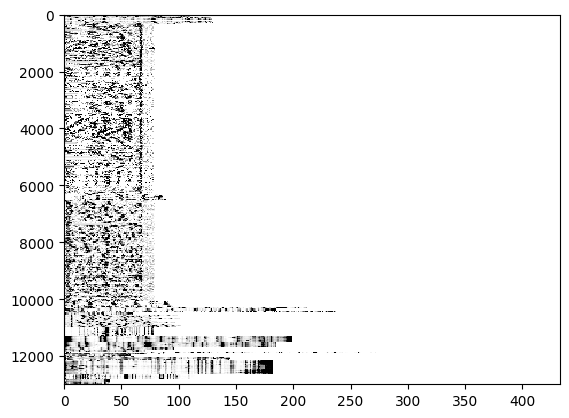

In [9]:
length = 433
label_names=[f"reactivity_{i+1:04}" for i in range(length)]
experiment_type = 'DMS'
reactivity = df[ df["experiment_type"]==experiment_type][label_names].to_numpy()
plt.imshow( reactivity,vmin=0,vmax=1,aspect='auto',interpolation='none',cmap='binary' )

**The graph: what is it?**

This graph visualizes the reactivity values from an RNA mapping experiment using DMS (dimethyl sulfate) treatment.

DMS is a chemical that preferentially reacts with unpaired adenines and cytosines in RNA, and the extent of this reaction is often used to infer RNA structure.

Here x-axis of the plot corresponds to the positions along the RNA sequence, from the 1st to the 433rd nucleotide, based on your length variable.

The y-axis represents different RNA sequences or experiments included in the dataset. Each row in the heatmap corresponds to a different RNA sequence or a different measurement from the dataset.

The color intensity in the heatmap indicates the reactivity value for each nucleotide position in each RNA sequence. In the plot, vmin=0 and vmax=1 set the scale for these values. Areas with higher reactivity (closer to 1) are more intensely colored, while lower reactivity (closer to 0) are less intensely colored.



**What it means?**

High reactivity at a particular nucleotide position suggests that the nucleotide is likely unpaired or flexible, as DMS can more easily react with unpaired adenines and cytosines. Low reactivity suggests that the nucleotide is likely paired or in a more structured region, making it less accessible to DMS.

**NEXT**

Also, there are mutate-and-map data in the dataset that come in blocks which show inferred DMS profiles for a target RNA sequence and then sequences that have mutations at each nucleotide.

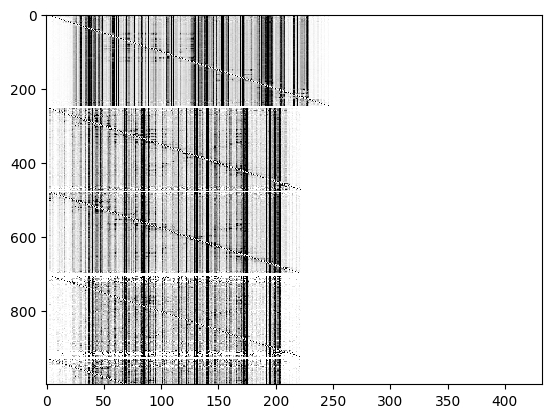

In [10]:
experiment_type = 'DMS_M2_seq'
# Just show first 1000 profiles so we can see the interesting patterns
reactivity = df[df["experiment_type"]==experiment_type][:1000][label_names].to_numpy()
plt.imshow( reactivity,vmin=0,vmax=1,aspect='auto',interpolation='none',cmap='binary' )

**What the graph means?**

Here, x axis is the same as previously (positions along the RNA sequence).Each row in the heatmap corresponds to a different RNA sequence – the original sequence and its variants with single-nucleotide mutations.

Changes in reactivity patterns across different rows (sequence variants) can reveal how specific nucleotides are involved in the RNA's structure. For example, if a mutation at a certain position significantly alters the reactivity pattern, it suggests that this nucleotide plays a crucial role in maintaining the structure.

**NEXT**

Co-transcriptional DMS sequence profiles provide a unique view of RNA structure dynamics during the process of transcription.

Co-transcriptional DMS Profiling involves treating RNA with DMS while it is being transcribed. In co-transcriptional profiling, the RNA is probed with DMS at different stages of its transcription, allowing researchers to observe how its structure evolves as it is being synthesized.

Here for y axis, each row corresponds to a different stage of the transcription process. The top rows represent early stages of transcription (shorter RNA fragments), while the bottom rows correspond to later stages (longer RNA fragments).

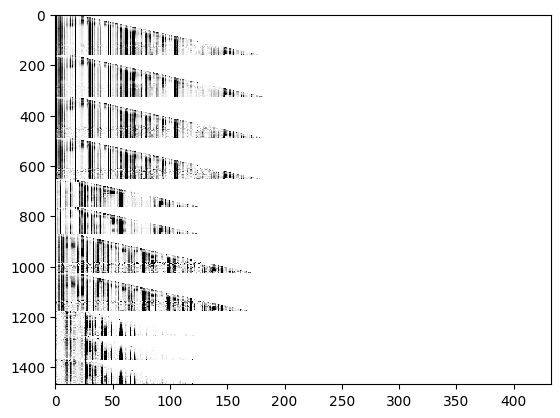

In [11]:
experiment_type = 'DMS_cotx'
reactivity = df[ df["experiment_type"]==experiment_type][label_names].to_numpy()
plt.imshow( reactivity,vmin=0,vmax=1,aspect='auto',interpolation='none',cmap='binary' )

Starting with test dataset!

In [ ]:
#df = pd.read_csv('/kaggle/input/stanford-ribonanza-rna-folding/train_data.csv')
df1= pd.read.csv('train_data.csv')
df.head()